#### Exercici 1. Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. També adjunt trobaràs una descripció de les diferents variables del dataset.

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('/Users/juliacorominasfont/Desktop/DATA ANALYST/Bootcamp IT Academy/Tasques Sprints/Sprint_5_SkLearn_Train_Test /housing data.csv', names= cols)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [161]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [162]:
housing.shape

(506, 14)

El dataset té 506 registres i 14 columnes. Dels 14 atributs, tretze contenen una variable continua i el restant una variable binària. 

- CRIM: Índex de criminalitat per càpita CRIM per ciutat
- ZN: proporció de sòl residencial zonificat per a lots de més de 25.000 peus quadrats
- INDUS: proporció d'acres comercials no minoristes per ciutat
- CHAS: Variable binària fictícia de Charles River (= 1 si la zona està al costat del riu; 0 en cas contrari)
- NOX: concentració d'òxids nítrics (parts per 10 milions)
- RM: nombre mitjà d'habitacions per habitatge
- AGE: proporció d'unitats ocupades pels seus propietaris construïdes abans de 1940
- DIS: distàncies ponderades a cinc centres d'ocupació de Boston
- RAD: índex d'accessibilitat a autopistes radials
- TAX: taxa de l'impost sobre béns immobles de valor íntegre per 10.000 dòlars
- PTRATIO: ràtio alumne-professor per ciutat
- B: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per ciutat
- LSTAT: % estatus inferior de la població
- MEDV: Valor mitjà dels habitatges ocupats pels seus propietaris en 1000$.

La variable objectiu (o target) és MEDV, que fa referència al valor dels habitatges en els suburbis de Boston. La resta d'atributs constitueixen el 'feature matrix'. 

In [163]:
#Neteja i exploració del Dataset

#Comprovar si hi ha duplicats
housing.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [164]:
#Comprovació dels NaNs 
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No hi ha valors nuls en cap de les variables, pel que no cal atendre aquesta qüestió.

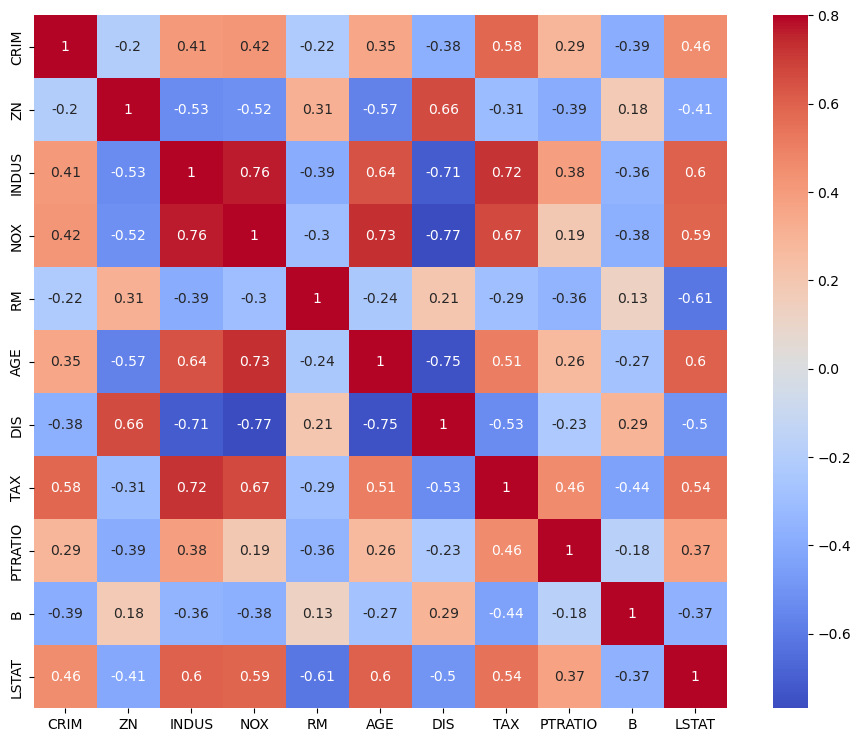

In [165]:
#Relació entre variables numèriques 
variables_numeriques = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(housing[variables_numeriques].corr(), vmax=.8, square=True, annot=True, cmap='coolwarm');
plt.show()

Les variables amb una correlació més forta entre sí són INDUS i NOX, de 0.76. La primera fa referència a la proporció d'acres comercials no minoristes per ciutat, mentre que la segona es refereix la concentració d'òxids nítrics. Per tant, un augment proporció d'acres comercials no minoristes també implica un augment de la concentració d'òxids nítrics.

Per contra, veiem que els atributs NOX i DIS són els que tenen una relació negativa més forta (-0,77). El primer fa referència a la concentració d'òxids nítrics, mentre que el segon es refereix a les distàncies ponderades respecte de cinc centres d'ocupació de Boston. Això ens indica que com més gran sigui la distància i, per tant, com més lluny estiguin els centres d'ocupació, menor serà la concentració d'òxids nítrics.

### Conjunts Train i Test

In [166]:
#Divisió del conjunt en Training i Test Set

from sklearn.model_selection import train_test_split

X = housing.drop('MEDV', axis=1) #característiques(features)
y = housing['MEDV'] #variable target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Forma del Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Forma del Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Forma del Training set: X=(404, 13), y=(404,)
Forma del Test set: X=(102, 13), y=(102,)


In [167]:
# Estudi descriptiu del Train Set 
X_train[variables_numeriques].describe().round(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000
mean,3.609,11.569,10.985,0.556,6.316,68.556,3.808,404.032,18.318,356.278,12.457
std,8.875,23.152,6.895,0.118,0.709,27.995,2.131,166.173,2.229,91.567,7.110
min,0.009,0.000,0.740,0.385,3.863,2.900,1.130,187.000,12.600,0.320,1.730
25%,0.081,0.000,5.130,0.452,5.890,45.550,2.088,279.000,16.800,375.472,6.772
50%,0.261,0.000,8.560,0.538,6.210,77.700,3.176,330.000,18.700,391.305,10.925
75%,3.203,20.000,18.100,0.631,6.637,93.650,5.401,666.000,20.200,395.755,16.373
max,88.976,100.000,27.740,0.871,8.780,100.000,12.126,711.000,22.000,396.900,37.970


In [168]:
# Estudi descriptiu del Test Set 
X_test[variables_numeriques].describe().round(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,3.631,10.549,11.738,0.548,6.161,68.648,3.743,424.892,18.999,358.241,13.428
std,7.460,24.083,6.723,0.109,0.664,28.891,2.011,177.462,1.801,90.642,7.245
min,0.006,0.000,0.460,0.392,3.561,6.200,1.169,188.000,13.000,6.680,2.880
25%,0.087,0.000,6.102,0.448,5.870,43.800,2.264,281.750,18.400,375.020,7.688
50%,0.210,0.000,10.590,0.532,6.171,74.700,3.353,345.000,19.200,392.205,12.335
75%,4.522,0.000,18.100,0.621,6.479,95.225,4.765,666.000,20.200,396.900,18.018
max,45.746,95.000,27.740,0.871,8.034,100.000,10.710,711.000,22.000,396.900,36.980


Destaca la diferència entre la mitjana i la mediana de les variables CRIM, ZN i TAX, essent la primera molt superior a la segona. Això ens indica que la distribució està notablement esbiaixada cap a la dreta. El contrari succeix amb les variables AGE i B. Per tant, en aquests casos la distribució està esbiaixada cap a l'esquerre.

Per exemple:

Text(0.5, 1.0, 'Proporció de població negra')

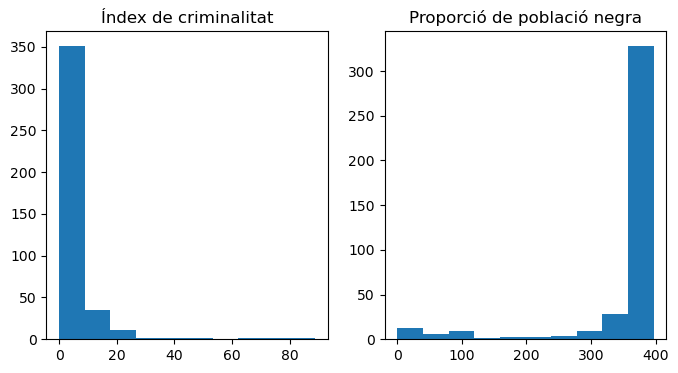

In [169]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1, 2, 1)

ax1.hist(X_train['CRIM'])
plt.title('Índex de criminalitat')

ax2 = fig.add_subplot(1, 2, 2)

ax2.hist(X_train['B'])
plt.title('Proporció de població negra')

<Axes: >

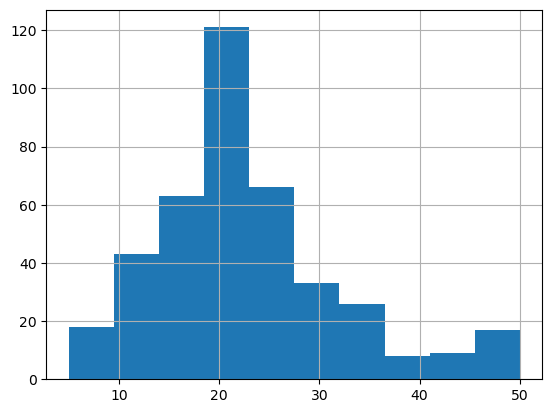

In [170]:
#Distribució de la variable target (train set)
y_train.hist()

<Axes: >

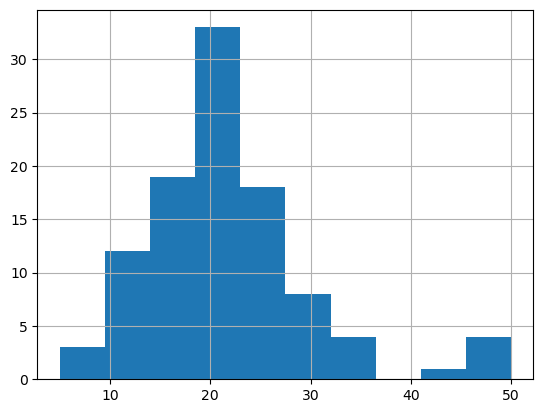

In [171]:
#Distribució de la variable target (test set)
y_test.hist()

Veiem que la distribució no és simètrica, sinó que està una mica esbiaixada cap a la dreta, i que és unimodal.

#### Exercici 2. Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

#### Dummies de variables categòriques

In [185]:
#Dummies
X_train['RAD'] = X_train['RAD'].astype(str) #convertim per poder fer el encoding
X_test['RAD'] = X_test['RAD'].astype(str)

train_dummies = pd.get_dummies(X_train['RAD'], prefix='RAD', drop_first=True)
variables_categoriques_train = pd.concat([X_train['CHAS'], train_dummies], axis=1)
variables_categoriques_train

,CHAS,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
477,0,0,1,0,0,0,0,0,0
15,0,0,0,0,1,0,0,0,0
332,0,0,0,0,0,0,0,0,0
423,0,0,1,0,0,0,0,0,0
19,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,1,0,0,0
270,0,0,0,1,0,0,0,0,0
348,0,0,0,0,1,0,0,0,0
435,0,0,1,0,0,0,0,0,0


In [186]:
test_dummies = pd.get_dummies(X_test['RAD'], prefix='RAD', drop_first=True)
variables_categoriques_test = pd.concat([X_test['CHAS'], test_dummies], axis=1)
variables_categoriques_test

,CHAS,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
173,0,0,0,0,0,1,0,0,0
274,1,0,0,0,1,0,0,0,0
491,0,0,0,0,1,0,0,0,0
72,0,0,0,0,1,0,0,0,0
452,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
412,0,0,1,0,0,0,0,0,0
436,0,0,1,0,0,0,0,0,0
411,0,0,1,0,0,0,0,0,0
86,0,0,0,1,0,0,0,0,0


No cal aplicar cap transformació a la variable categòrica CHAS, doncs ja que està en valors numèrics.

#### Estandarització o normalització

- Variables normals? Sí, StandardScaler()
- No, fem una normalització. 
  - Té outliers? RobustScaler
  - No té outliers? MinMaxScaler

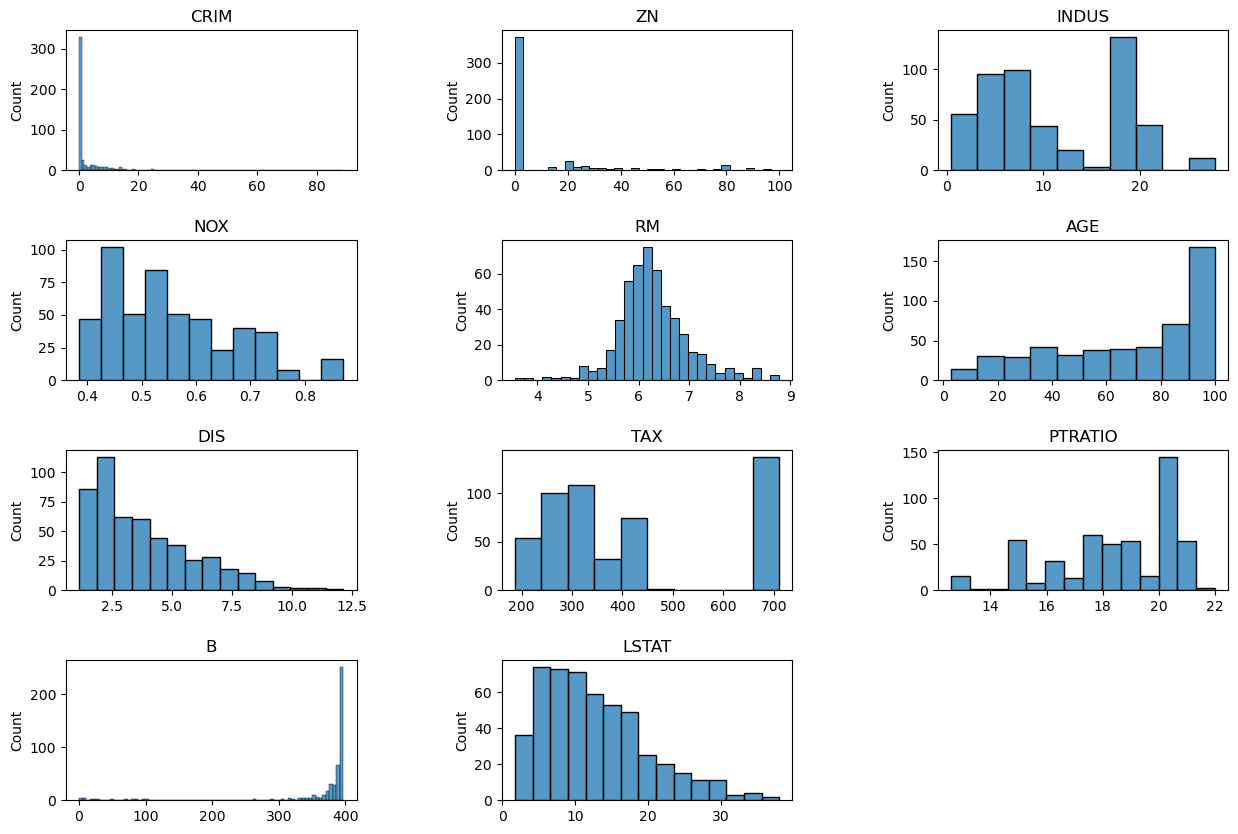

In [174]:
#Estudi previ de la distribució de les variables per determinar el tipus d'estandarització

fig, axes = plt.subplots(4, 3, figsize=(15, 10))

axes = axes.flatten()

for i, variable in enumerate(variables_numeriques):
    sns.histplot(x=X[variable], ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set(xlabel='')

for j in range(i+1, 4 * 3): #para eliminar l'últim gràfic
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Veiem que les variables no tenen una distribució normal, per tant, no fem servir el StandardScaler().

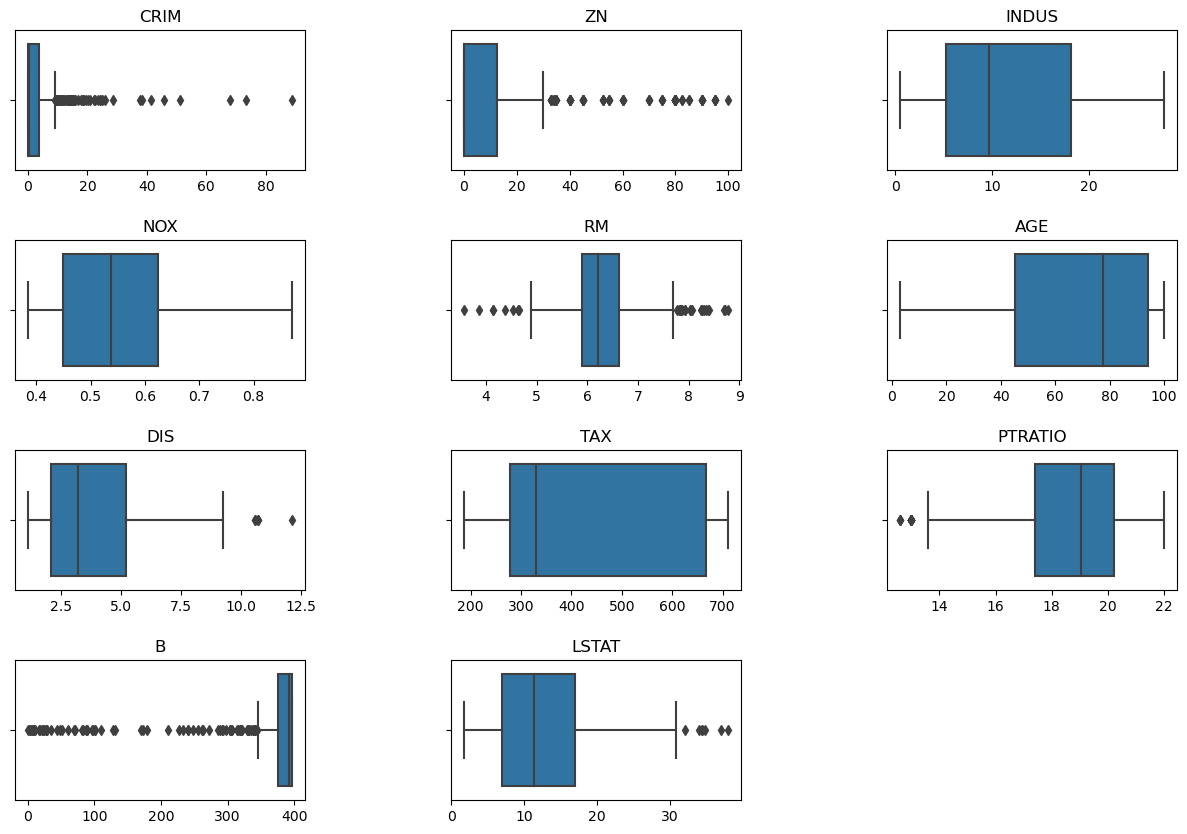

In [175]:
#Identificar outliers per saber si utilitzar RobustScaler o MinMaxScaler 

fig, axes = plt.subplots(4, 3, figsize=(15, 10))

axes = axes.flatten()

for i, variable in enumerate(variables_numeriques):
    sns.boxplot(x=X[variable], ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set(xlabel='')

for j in range(i+1, 4 * 3): #para eliminar l'últim gràfic
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Segons si les variables tenen o no outliers les normalitzarem utilitzant el RobustScaler() - si en tenen - o el (MinMaxScaler) - si no en tenen. 
A diferència dels altres estandaritzadors, el RobustScaler() es basa en percentils i, per tant, no està influenciat pels valors atípics.

In [176]:
#Estandarització variables amb outliers
from sklearn.preprocessing import RobustScaler

variables_outliers = ['CRIM', 'ZN', 'RM', 'PTRATIO', 'B', 'LSTAT'] 

robustscaler = RobustScaler()
robustscaler.fit(X_train[variables_outliers])#fit només amb X_train

X_train[variables_outliers] = robustscaler.transform(X_train[variables_outliers])
X_test[variables_outliers] = robustscaler.transform(X_test[variables_outliers]) #transforma mb X_train i X_test

In [177]:
#Estandarització variables sense outliers
from sklearn.preprocessing import MinMaxScaler

variables_minmax = ['INDUS', 'NOX', 'AGE', 'TAX']

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train[variables_minmax])

X_train[variables_minmax] = minmaxscaler.transform(X_train[variables_minmax])
X_test[variables_minmax] = minmaxscaler.transform(X_test[variables_minmax])

In [191]:
#Dataframe Train
train_transformed = pd.concat([X_train[variables_outliers], X_train[variables_minmax], variables_categoriques_train, y_train], axis=1)
train_transformed

,CRIM,ZN,RM,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX,CHAS,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,MEDV
477,4.729102,0.00,-1.214070,0.441176,-2.062123,1.456771,0.642963,0.471193,0.972194,0.914122,0,0,1,0,0,0,0,0,0,12.0
15,0.117250,0.00,-0.503853,0.676471,0.212745,-0.255729,0.274074,0.314815,0.552008,0.229008,0,0,0,0,1,0,0,0,0,19.9
332,-0.072634,1.75,-0.239866,-0.529412,-1.432516,-0.322396,0.197037,0.108848,0.210093,0.223282,0,0,0,0,0,0,0,0,0,19.4
423,2.174908,0.00,-0.143384,0.441176,-19.168495,1.288021,0.642963,0.471193,0.846550,0.914122,0,0,1,0,0,0,0,0,0,13.4
19,0.148777,0.00,-0.647236,0.676471,-0.017503,0.036979,0.274074,0.314815,0.685891,0.229008,0,0,0,0,1,0,0,0,0,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.028893,0.00,-0.501173,0.647059,0.215210,0.805729,0.289630,0.277778,0.916581,0.375954,0,0,0,0,0,1,0,0,0,19.5
270,0.012100,1.00,-0.474372,-0.029412,-0.130901,0.216146,0.230370,0.162551,0.403708,0.068702,0,0,0,1,0,0,0,0,0,21.1
348,-0.078929,4.00,0.569514,-0.500000,-0.017996,-0.514062,0.047037,0.102881,0.276004,0.177481,0,0,0,0,1,0,0,0,0,24.5
435,3.491566,0.00,0.561474,0.441176,-13.876741,1.285937,0.642963,0.730453,0.944387,0.914122,0,0,1,0,0,0,0,0,0,13.4


In [192]:
#Dataframe Test
test_transformed = pd.concat([X_test[variables_outliers], X_test[variables_minmax], variables_categoriques_test, y_test], axis=1)
test_transformed

,CRIM,ZN,RM,PTRATIO,B,LSTAT,INDUS,NOX,AGE,TAX,CHAS,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,MEDV
173,-0.054336,0.0,0.276047,-0.617647,0.206829,-0.196354,0.122593,0.257202,0.836251,0.208015,0,0,0,0,0,1,0,0,0,23.6
274,-0.065657,2.0,0.734338,-0.323529,0.275854,-0.770313,0.210000,0.127572,0.308960,0.127863,1,0,0,0,1,0,0,0,0,32.4
491,-0.049863,0.0,-0.304188,0.411765,-0.058918,0.744271,1.000000,0.460905,0.987642,1.000000,0,0,0,0,1,0,0,0,0,13.6
72,-0.054380,0.0,-0.194305,0.147059,-0.019475,-0.563021,0.372963,0.057613,0.050463,0.225191,0,0,0,0,1,0,0,0,0,22.8
452,1.546930,0.0,0.116583,0.441176,-0.306422,0.660937,0.642963,0.674897,0.915551,0.914122,0,0,1,0,0,0,0,0,0,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,5.942483,0.0,-2.119933,0.441176,-17.873290,2.442187,0.642963,0.436214,1.000000,0.914122,0,0,1,0,0,0,0,0,0,17.9
436,4.536055,0.0,0.336348,0.441176,-17.937384,0.742187,0.642963,0.730453,0.930999,0.914122,0,0,1,0,0,0,0,0,0,9.6
411,4.417491,0.0,0.598995,0.441176,-17.564649,1.072396,0.642963,0.436214,1.000000,0.914122,0,0,1,0,0,0,0,0,0,17.2
86,-0.067118,0.0,-0.261307,-0.058824,0.230987,0.201562,0.138889,0.131687,0.434604,0.114504,0,0,0,1,0,0,0,0,0,22.5


In [196]:
train_transformed.columns

Index(['CRIM', 'ZN', 'RM', 'PTRATIO', 'B', 'LSTAT', 'INDUS', 'NOX', 'AGE',
       'TAX', 'CHAS', 'RAD_2', 'RAD_24', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6',
       'RAD_7', 'RAD_8', 'MEDV'],
      dtype='object')

#### Exercici 3. Resumeix les noves columnes generades de manera estadística i gràfica

In [197]:
#Train Set
train_RAD_categories = train_transformed[['RAD_2', 'RAD_24', 'RAD_3', 'RAD_4', 'RAD_5',
       'RAD_6', 'RAD_7', 'RAD_8']]
train_RAD_categories.describe()

,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
count,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.051980,0.25000,0.079208,0.198020,0.232673,0.056931,0.037129,0.051980
std,0.222262,0.43355,0.270398,0.399001,0.423060,0.231997,0.189312,0.222262
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
train_RAD_counts = pd.DataFrame(train_RAD_categories.sum())
train_RAD_counts

,0
RAD_2,21
RAD_24,101
RAD_3,32
RAD_4,80
RAD_5,94
RAD_6,23
RAD_7,15
RAD_8,21


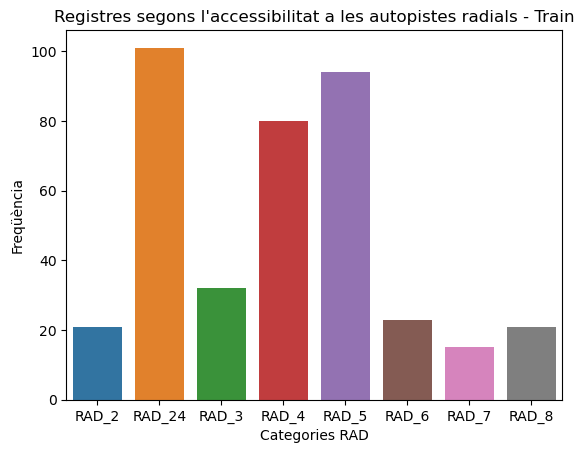

In [199]:
sns.barplot(x=train_RAD_counts.index, y=train_RAD_counts[0])

plt.xlabel('Categories RAD')
plt.ylabel("Freqüència")
plt.title("Registres segons l'accessibilitat a les autopistes radials - Train")
plt.show()

Dins de la variable RAD, el valor més freqüent és RAD_24, seguit de RAD_5 i RAD_4. 

In [200]:
#Test Set
test_RAD_categories = test_transformed[['RAD_2', 'RAD_24', 'RAD_3', 'RAD_4', 'RAD_5',
       'RAD_6', 'RAD_7', 'RAD_8']]
test_RAD_categories.describe()

,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.029412,0.303922,0.058824,0.294118,0.205882,0.029412,0.019608,0.029412
std,0.169792,0.462221,0.236456,0.457895,0.406342,0.169792,0.139333,0.169792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
test_transformed.columns

Index(['CRIM', 'ZN', 'RM', 'PTRATIO', 'B', 'LSTAT', 'INDUS', 'NOX', 'AGE',
       'TAX', 'CHAS', 'RAD_2', 'RAD_24', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6',
       'RAD_7', 'RAD_8', 'MEDV'],
      dtype='object')

In [202]:
test_RAD_counts = pd.DataFrame(test_RAD_categories.sum())
test_RAD_counts

,0
RAD_2,3
RAD_24,31
RAD_3,6
RAD_4,30
RAD_5,21
RAD_6,3
RAD_7,2
RAD_8,3


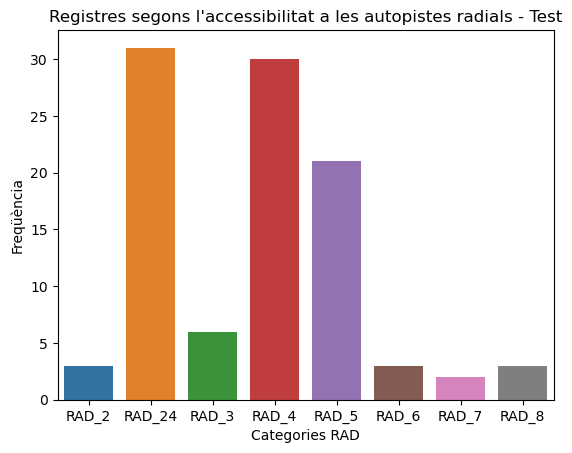

In [203]:
sns.barplot(x=test_RAD_counts.index, y=test_RAD_counts[0])

plt.xlabel('Categories RAD')
plt.ylabel("Freqüència")
plt.title("Registres segons l'accessibilitat a les autopistes radials - Test")
plt.show()

Dins de la variable RAD, el valor més freqüent és RAD_24, però en aquest cas seguit, per olt poca diferència, de RAD_4 i per RAD_5.

In [204]:
#Train Test

train_CHAS_count = X_train_prepared['CHAS'].value_counts()
train_CHAS_count

0    375
1     29
Name: CHAS, dtype: int64

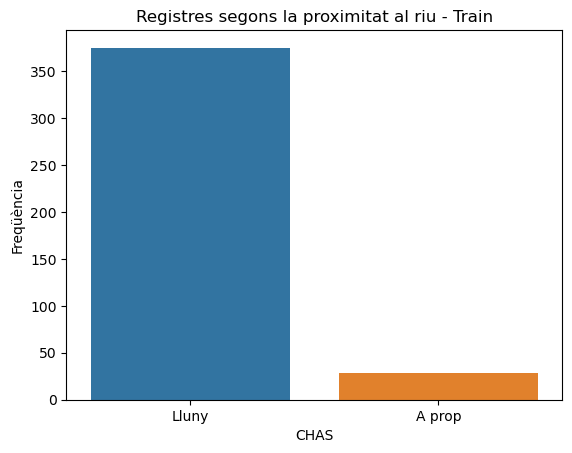

In [205]:
sns.barplot(x=train_CHAS_count.index, y=train_CHAS_count.values)

plt.xlabel('CHAS')
plt.ylabel("Freqüència")
plt.title("Registres segons la proximitat al riu - Train")
plt.xticks([0, 1], ['Lluny', 'A prop'])
plt.show()

Dels 404 registres del conjunt Train, 375 no estan al costat del riu, mentre que 29 si que ho estan. 

In [206]:
#Test Test

test_CHAS_count = X_test_prepared['CHAS'].value_counts()
test_CHAS_count

0    96
1     6
Name: CHAS, dtype: int64

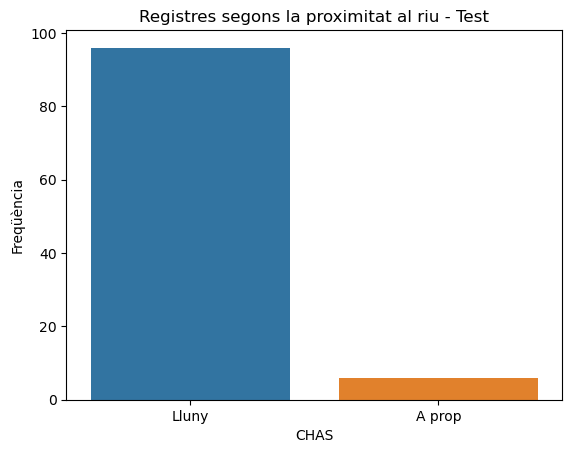

In [207]:
sns.barplot(x=test_CHAS_count.index, y=test_CHAS_count.values)

plt.xlabel('CHAS')
plt.ylabel("Freqüència")
plt.title("Registres segons la proximitat al riu - Test")
plt.xticks([0, 1], ['Lluny', 'A prop'])
plt.show()

Dels 202 registres de conjunt Test, 96 no estan al costat del riu, mentre que 6 si que ho estan. 

In [208]:
#Exportar el dataset transformat i preparat
train_transformed.to_excel('/Users/juliacorominasfont/Desktop/DATA ANALYST/Bootcamp IT Academy/Tasques Sprints/Sprint_6_ML_Regressions/housing_train_transformed.xlsx')
test_transformed.to_excel('/Users/juliacorominasfont/Desktop/DATA ANALYST/Bootcamp IT Academy/Tasques Sprints/Sprint_6_ML_Regressions/housing_test_transformed.xlsx')